https://www.tensorflow.org/tutorials/keras/classification

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [ ]:
#for data upload
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

upload data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
#fashion_mnist

In [ ]:
#train_dataset = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
batch_size = 10 # should be 16
img_height = 256
img_width = 256
channels = 3

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  #'/content/drive/MyDrive/archive/',
  '/content/drive/MyDrive/test_photos/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 908 files belonging to 3 classes.
Using 727 files for training.


In [ ]:
class_names = train_ds.class_names

In [ ]:
class_names

['Curly Hair', 'Straight Hair', 'Wavy Hair']

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/test_photos/',
  validation_split=0.4, #usually 0.2 but it seems to be running out of data
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 908 files belonging to 3 classes.
Using 363 files for validation.


visualize data

In [ ]:
import matplotlib.pyplot as plt


'''
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.imshow(images[i].numpy().astype("JPG"))
    #plt.imshow(images[i])
    plt.title(class_names[labels[i]])
    #plt.axis("off")
'''

'\nplt.figure(figsize=(10, 10))\nfor images, labels in train_ds.take(1):\n  for i in range(9):\n    ax = plt.subplot(3, 3, i + 1)\n    plt.imshow(images[i].numpy().astype("uint8"))\n    #plt.imshow(images[i].numpy().astype("JPG"))\n    #plt.imshow(images[i])\n    plt.title(class_names[labels[i]])\n    #plt.axis("off")\n'

In [ ]:
'''
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.imshow(images[i].numpy().astype("JPG"))
    #plt.imshow(images[i])
    plt.title(class_names[labels[i]])
    #plt.axis("off")
'''

'\nplt.figure(figsize=(10, 10))\nfor images, labels in val_ds.take(1):\n  for i in range(3):\n    ax = plt.subplot(3, 3, i + 1)\n    plt.imshow(images[i].numpy().astype("uint8"))\n    #plt.imshow(images[i].numpy().astype("JPG"))\n    #plt.imshow(images[i])\n    plt.title(class_names[labels[i]])\n    #plt.axis("off")\n'

In [ ]:
'''
#to check image file type

import os
import cv2
def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                index=f.rfind('.')
                ext=f[index+1:].lower()
                if ext not in ext_list:
                    print('file ', f_path, ' has an invalid extension ', ext)
                    bad_ext.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir =r'/content/drive/MyDrive/test_photos/'
good_exts=['png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions often includes 'jpg', 
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')
'''

"\n#to check image file type\n\nimport os\nimport cv2\ndef check_images( s_dir, ext_list):\n    bad_images=[]\n    bad_ext=[]\n    s_list= os.listdir(s_dir)\n    for klass in s_list:\n        klass_path=os.path.join (s_dir, klass)\n        print ('processing class directory ', klass)\n        if os.path.isdir(klass_path):\n            file_list=os.listdir(klass_path)\n            for f in file_list:               \n                f_path=os.path.join (klass_path,f)\n                index=f.rfind('.')\n                ext=f[index+1:].lower()\n                if ext not in ext_list:\n                    print('file ', f_path, ' has an invalid extension ', ext)\n                    bad_ext.append(f_path)\n                if os.path.isfile(f_path):\n                    try:\n                        img=cv2.imread(f_path)\n                        shape=img.shape\n                    except:\n                        print('file ', f_path, ' is not a valid image file')\n                      

Configure the dataset for performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Standardize the data

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
#there's more code but I am try9ing not using this

Create the model

In [ ]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
73/73 [==============================] - 176s 984ms/step - loss: 1.1787 - accuracy: 0.3521 - val_loss: 1.0846 - val_accuracy: 0.4656
Epoch 2/10
73/73 [==============================] - 48s 657ms/step - loss: 1.0190 - accuracy: 0.4856 - val_loss: 1.2878 - val_accuracy: 0.3140
Epoch 3/10
73/73 [==============================] - 47s 646ms/step - loss: 0.9886 - accuracy: 0.4911 - val_loss: 0.8599 - val_accuracy: 0.5758
Epoch 4/10
73/73 [==============================] - 47s 646ms/step - loss: 0.7604 - accuracy: 0.6740 - val_loss: 0.7443 - val_accuracy: 0.6804
Epoch 5/10
73/73 [==============================] - 48s 657ms/step - loss: 0.4412 - accuracy: 0.8212 - val_loss: 0.6456 - val_accuracy: 0.7686
Epoch 6/10
73/73 [==============================] - 47s 650ms/step - loss: 0.2507 - accuracy: 0.9175 - val_loss: 0.8177 - val_accuracy: 0.7245
Epoch 7/10
73/73 [==============================] - 49s 669ms/step - loss: 0.0933 - accuracy: 0.9807 - val_loss: 0.9185 - val_accuracy: 0.787

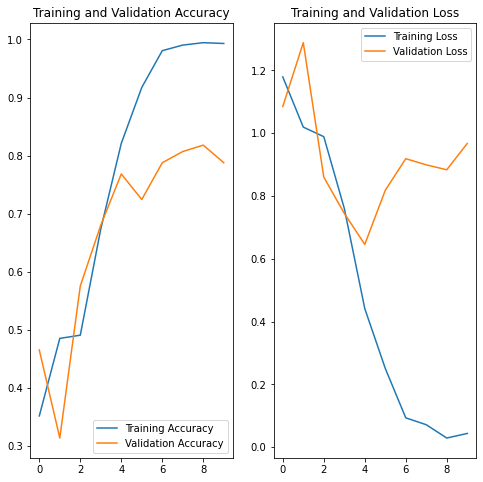

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Predict

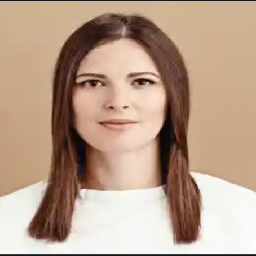

In [ ]:
# Get new prediction image
new_img_name = os.listdir('/content/drive/MyDrive/prediction_photos')[1]
new_img = load_img('/content/drive/MyDrive/prediction_photos/{}'.format( new_img_name), target_size=(256, 256))
new_img

In [ ]:

img_array = keras.preprocessing.image.img_to_array(new_img)
img_array = tf.expand_dims(img_array, 0) # Create a batch



In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Straight Hair with a 85.87 percent confidence.


In [42]:
score

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.000000e+00, 1.776884e-08, 5.624256e-08], dtype=float32)>

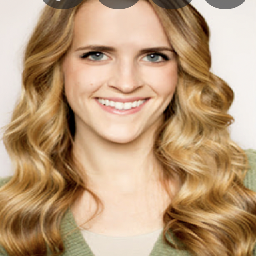

In [ ]:
# Get new prediction image
new_img_name = os.listdir('/content/drive/MyDrive/prediction_photos')[0]
new_img = load_img('/content/drive/MyDrive/prediction_photos/{}'.format( new_img_name), target_size=(256, 256))
new_img

In [ ]:

img_array = keras.preprocessing.image.img_to_array(new_img)
img_array = tf.expand_dims(img_array, 0) # Create a batch



In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Wavy Hair with a 76.79 percent confidence.


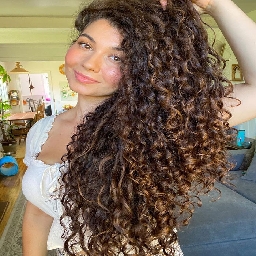

In [ ]:
# Get new prediction image
new_img_name = os.listdir('/content/drive/MyDrive/prediction_photos')[2]
new_img = load_img('/content/drive/MyDrive/prediction_photos/{}'.format( new_img_name), target_size=(256, 256))
new_img

In [ ]:

img_array = keras.preprocessing.image.img_to_array(new_img)
img_array = tf.expand_dims(img_array, 0) # Create a batch



In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Curly Hair with a 100.00 percent confidence.
